# Google Analytics Revenue Prediction

## EDA

**Environment**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from myfunctions import *

**Import Dataframe**

In [3]:
df = pd.read_csv("data/df3-2.csv", low_memory=False)

In [4]:
df.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsHits,totalsNewVisits,totalsPageviews,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoPage,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource,totalsTransactionRevenue,totalsTransactionRevenueDoll,totalsIsTransaction
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,False,google + online,organic,NoReferral,google,0.0,0.0,False
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,1,0.0,1.0,NoAd,NoAdWords,0,0.0,NaN,NoCampaign,True,NoKeyword,organic,NoReferral,google,0.0,0.0,False


### EDA NUMERICAL

The EDA of the numerical vars is on another notebook.

### EDA CATEGORICAL

Subsetting the dataframe with the categorical vars

In [5]:
cat_cols = ['channelGrouping', 'date', 'fullVisitorId', 'visitNumber',
       'visitStartTime', 'deviceBrowser', 'deviceCategory', 'deviceIsMobile',
       'deviceOS', 'geoCity', 'geoContinent', 'geoCountry', 'geoMetro',
       'geoDomain', 'geoRegion', 'geoSubContinent', 'totalsBounces',
       'totalsNewVisits', 'trafficSourceAdContent', 'adwordsClickAdNetworkType',
       'adwordsClickGclId', 'adwordsClickInfoSlot',
       'trafficSourceCampaign', 'trafficSourceIsTrueDirect',
       'trafficSourceKeyword', 'trafficSourceMedium',
       'trafficSourceReferralPath', 'trafficSourceSource']

In [6]:
df[cat_cols]

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsNewVisits,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,google + online,organic,NoReferral,google
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,0.0,NoAd,NoAdWords,0,NaN,NoCampaign,True,NoKeyword,organic,NoReferral,google
5,Organic Search,2016-09-02,2938943183656635653,1,1472807194,Chrome,desktop,False,Windows,Unknown,Europe,Italy,Unknown,fastwebnet.it,Unknown,Southern Europe,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google
6,Organic Search,2016-09-02,1905672039242460897,1,1472817241,Chrome,desktop,False,Windows,Unknown,Asia,Pakistan,Unknown,Unknown,Unknown,Southern Asia,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google
7,Organic Search,2016-09-02,537222803633850821,1,1472812602,Chrome,desktop,False,Windows,Brisbane,Oceania,Australia,Unknown,bigpond.net.au,Queensland,Australasia,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google
8,Organic Search,2016-09-02,4445454811831400414,1,1472805784,Internet Explorer,desktop,False,Windows,Unknown,Europe,Austria,Unknown,spar.at,Unknown,Western Europe,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google
9,Organic Search,2016-09-02,9499785259412240342,1,1472812272,Firefox,desktop,False,Windows,Unknown,Europe,Netherlands,Unknown,chello.nl,Unknown,Western Europe,1.0,1.0,NoAd,NoAdWords,0,NaN,NoCampaign,False,NoKeyword,organic,NoReferral,google


In [7]:
df[cat_cols].describe(include='O').T

,count,unique,top,freq
channelGrouping,903455,8,Organic Search,381530
date,903455,366,2016-11-28,4807
fullVisitorId,903455,717715,1957458976293878100,278
deviceBrowser,903455,54,Chrome,620214
deviceCategory,903455,3,desktop,664352
deviceOS,903455,20,Windows,350006
geoCity,903455,648,Unknown,542383
geoContinent,901989,5,Americas,450221
geoCountry,901989,221,United States,364601
geoMetro,903455,93,Unknown,709864


#### channelGrouping

The description of the var itself

Numbers of Nulls:  0
Organic Search    381530
Social            226102
Direct            143002
Referral          104811
Paid Search        25227
Affiliates         16401
Display             6262
Other                120
Name: channelGrouping, dtype: int64


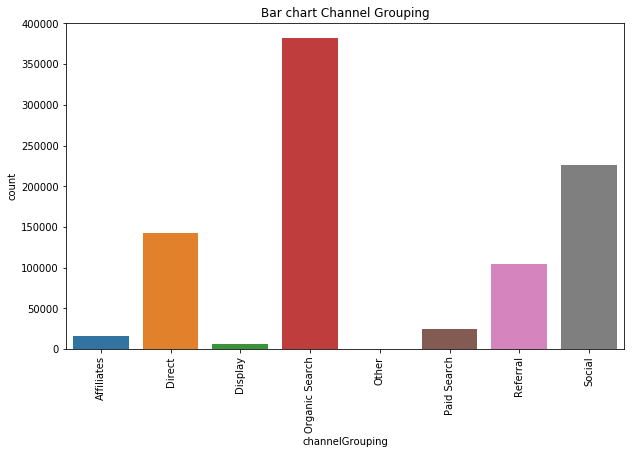

In [8]:
desc_cat(df, 'channelGrouping', 'Channel Grouping') #function created to describe categoricals

The categories are unbalanced. Beeing Organic Search, Social, Direct and Referral the main channels of the visits.

The var comparing it to the target

totalsIsTransaction   False  True 
channelGrouping                   
Affiliates            16392      9
Direct               140960   2042
Display                6120    142
Organic Search       378092   3438
Other                   119      1
Paid Search           24759    468
Referral              99500   5311
Social               225998    104


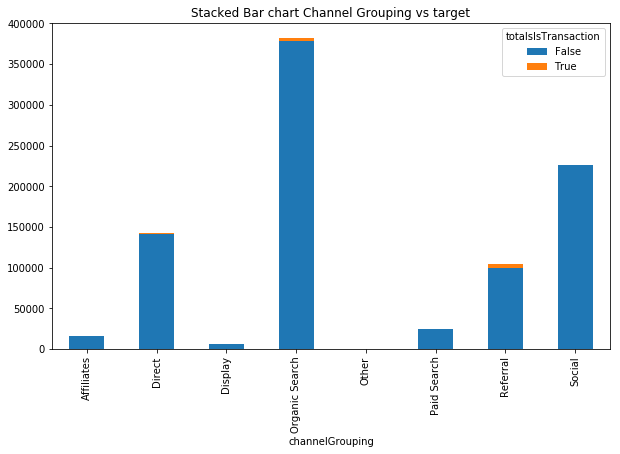

In [30]:
desc_cat_target(df, 'channelGrouping', 'totalsIsTransaction', name='Channel Grouping')

#### deviceBrowser

Numbers of Nulls:  0
Chrome                                         620214
Safari                                         182213
Firefox                                         37062
Internet Explorer                               19369
Edge                                            10205
Android Webview                                  7864
Safari (in-app)                                  6850
Opera Mini                                       6139
Opera                                            5642
UC Browser                                       2427
YaBrowser                                        2096
Coc Coc                                           727
Amazon Silk                                       560
Android Browser                                   553
Mozilla Compatible Agent                          374
MRCHROME                                          263
Maxthon                                           246
BlackBerry                                        184
Nintend

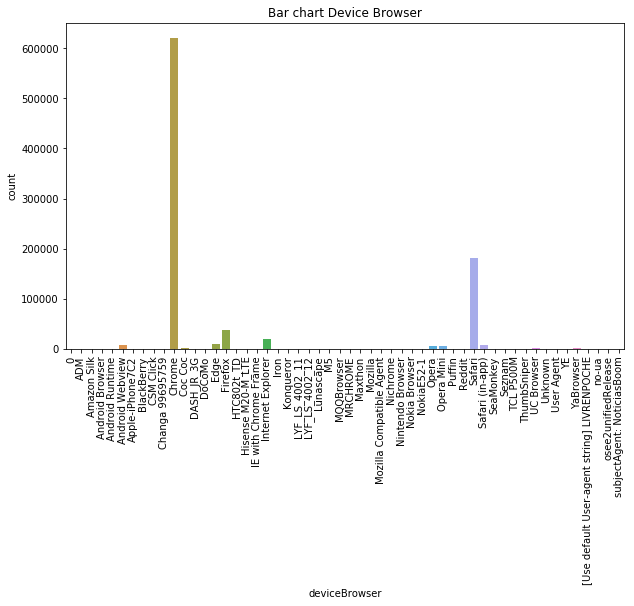

In [10]:
desc_cat(df, 'deviceBrowser', 'Device Browser')

totalsIsTransaction                             False    True 
deviceBrowser                                                 
0                                                 7.0      0.0
ADM                                               1.0      0.0
Amazon Silk                                     559.0      1.0
Android Browser                                 553.0      0.0
Android Runtime                                   2.0      0.0
Android Webview                                7858.0      6.0
Apple-iPhone7C2                                   9.0      0.0
BlackBerry                                      184.0      0.0
CSM Click                                         1.0      0.0
Changa 99695759                                   1.0      0.0
Chrome                                       609861.0  10353.0
Coc Coc                                         727.0      0.0
DASH_JR_3G                                        4.0      0.0
DoCoMo                                            1.0  

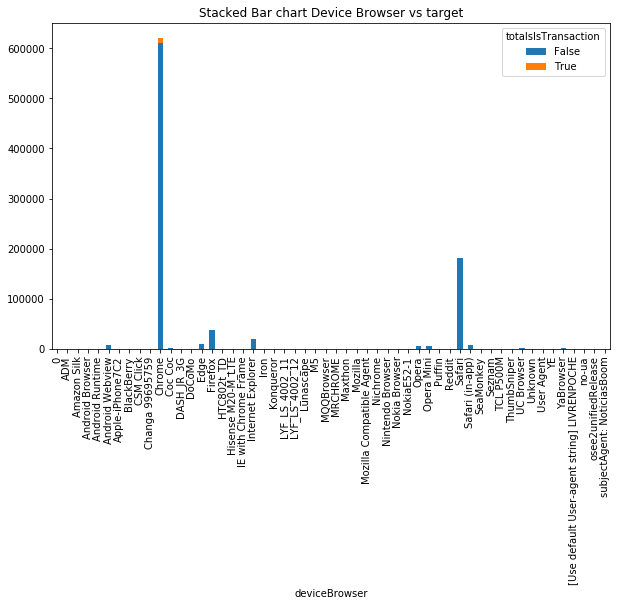

In [33]:
desc_cat_target(df, 'deviceBrowser', 'totalsIsTransaction', name='Device Browser')

#### deviceCategory

Numbers of Nulls:  0
desktop    664352
mobile     208672
tablet      30431
Name: deviceCategory, dtype: int64


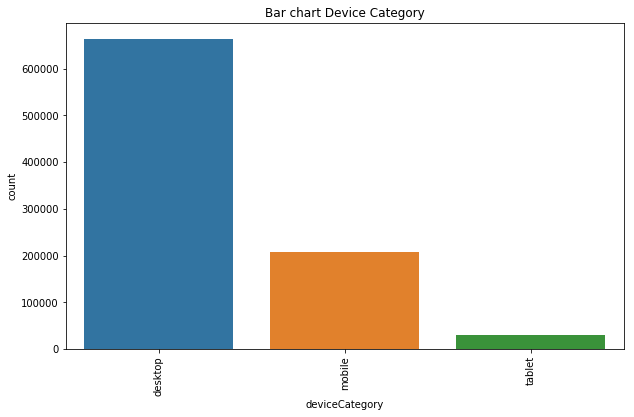

In [11]:
desc_cat(df, 'deviceCategory', 'Device Category')

#### deviceOS

Numbers of Nulls:  0
Windows          350006
Macintosh        253880
Android          123845
iOS              107643
Linux             35033
Chrome OS         26334
Unknown            4695
Windows Phone      1216
Samsung             280
BlackBerry          218
Nintendo Wii        100
Firefox OS           88
Xbox                 66
Nintendo WiiU        35
FreeBSD               9
OpenBSD               2
Nokia                 2
SunOS                 1
Nintendo 3DS          1
NTT DoCoMo            1
Name: deviceOS, dtype: int64


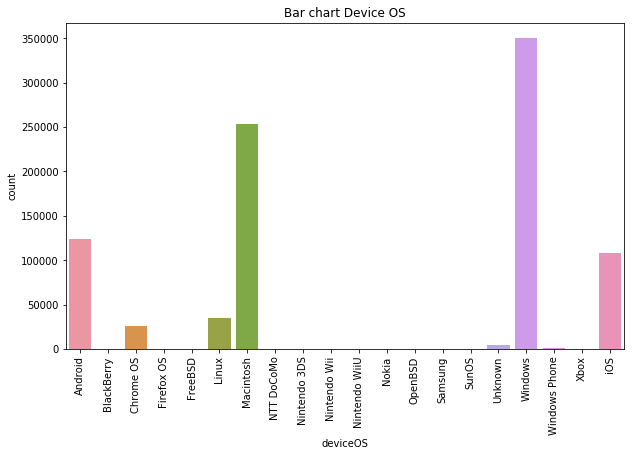

In [12]:
desc_cat(df, 'deviceOS', 'Device OS')

#### GEOGRAPHIC VARS

Numbers of Nulls:  0
Unknown                              542383
Mountain View                         40874
New York                              26361
San Francisco                         20319
Sunnyvale                             13083
London                                12605
San Jose                              10290
Los Angeles                            8667
Bangkok                                7709
Chicago                                7441
Ho Chi Minh City                       7341
Istanbul                               6330
Bengaluru                              5467
Toronto                                5222
Hanoi                                  5030
Seattle                                5024
Sydney                                 4925
Dublin                                 4877
Sao Paulo                              4104
Mumbai                                 4099
Chennai                                4090
Paris                                  4013
Hyderabad  

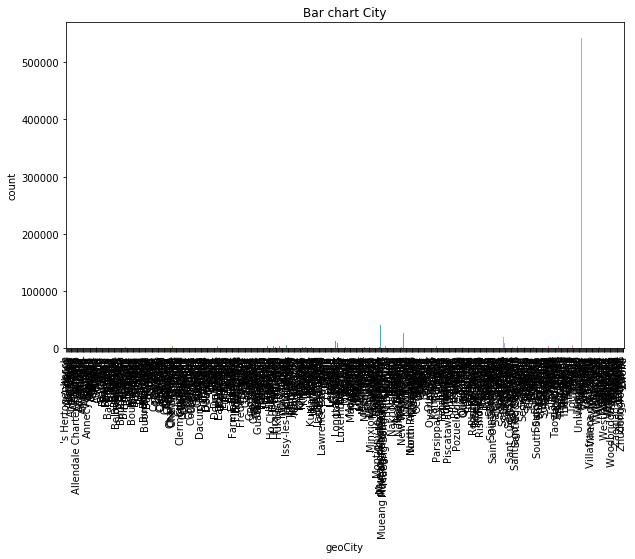

In [13]:
desc_cat(df, 'geoCity', 'City')

Numbers of Nulls:  0
Unknown                              542383
Mountain View                         40874
New York                              26361
San Francisco                         20319
Sunnyvale                             13083
London                                12605
San Jose                              10290
Los Angeles                            8667
Bangkok                                7709
Chicago                                7441
Ho Chi Minh City                       7341
Istanbul                               6330
Bengaluru                              5467
Toronto                                5222
Hanoi                                  5030
Seattle                                5024
Sydney                                 4925
Dublin                                 4877
Sao Paulo                              4104
Mumbai                                 4099
Chennai                                4090
Paris                                  4013
Hyderabad  

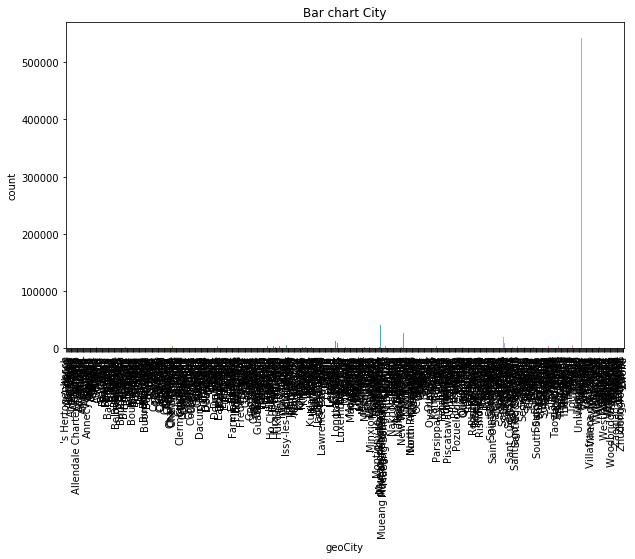

In [14]:
desc_cat(df, 'geoCity', 'City')

In [15]:
geoCity	903553	648	Unknown	542452
geoContinent	902087	5	Americas	450318
geoCountry	902087	221	United States	364697
geoMetro	903553	93	Unknown	709934
geoDomain	903553	28063	Unknown	390863
geoRegion	903553	375	Unknown	536016
geoSubContinent	903553	23	Northern America	390608

SyntaxError: invalid syntax (<ipython-input-15-fa1c75265fa2>, line 1)